![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)

# RMOTR Final  Project- Fifa players 

## Selma Bensaid

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
sns.set(rc={'figure.figsize': (18, 6)})

In [3]:
from zipfile import ZipFile
with ZipFile('data/fifa19.zip', 'r') as zf:
    zf.extractall('data/fifa19')

In [4]:
df = pd.read_csv('data/fifa19/data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.shape

(18207, 89)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [8]:
def parse_amount (monetary):
    try:
        amount=float(monetary[1:-1])
    except:
        ValueError()
    if type(monetary)== float:
        return monetary
    
    if monetary[-1]=='M':
        return amount*1000000
    if monetary[-1]=='K':
        return amount*1000
    return float(monetary[1:])
    
        
    
        
df['Value']=df['Value'].apply(parse_amount)
df['Wage']=df['Wage'].apply(parse_amount)
df['Release Clause']=df['Release Clause'].apply(parse_amount)

df['Release Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null 

In [10]:
def simplified_position(position):
    if position=='GK':
        return 'Goalkeeper'
    if position in ['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']:
        return 'Defender'
    if position in ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM']:
        return 'Midfielder'
    if position in ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']:
        return 'Attacker'

df['Simplified Position']=df['Position'].apply(simplified_position)    
df['Simplified Position'].value_counts()

Midfielder    6838
Defender      5866
Attacker      3418
Goalkeeper    2025
Name: Simplified Position, dtype: int64

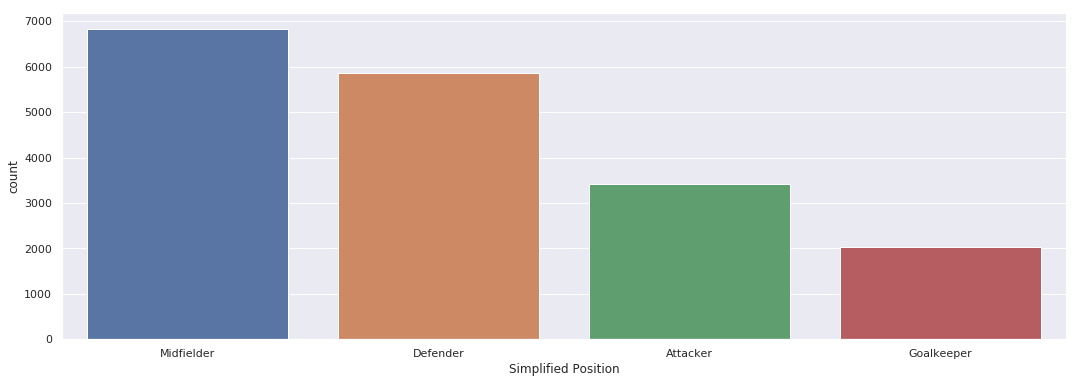

In [11]:
sns.countplot (x='Simplified Position', data=df, order=df['Simplified Position'].value_counts().index)

In [12]:
pd.to_datetime(df['Joined'])
df['Joined'].head()


0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [13]:
pd.to_datetime(df['Contract Valid Until'])
df['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 90 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null 

In [15]:
df2=df[df['Club'].notnull()]



In [16]:
df2=df2[df2['Value']!=0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17955 entries, 0 to 18206
Data columns (total 90 columns):
Unnamed: 0                  17955 non-null int64
ID                          17955 non-null int64
Name                        17955 non-null object
Age                         17955 non-null int64
Photo                       17955 non-null object
Nationality                 17955 non-null object
Flag                        17955 non-null object
Overall                     17955 non-null int64
Potential                   17955 non-null int64
Club                        17955 non-null object
Club Logo                   17955 non-null object
Value                       17955 non-null float64
Wage                        17955 non-null float64
Special                     17955 non-null int64
Preferred Foot              17907 non-null object
International Reputation    17907 non-null float64
Weak Foot                   17907 non-null float64
Skill Moves                 17907 non-null 

## Exploratory Data Analysis


Text(0.5,1,'top 10 highest paid players')

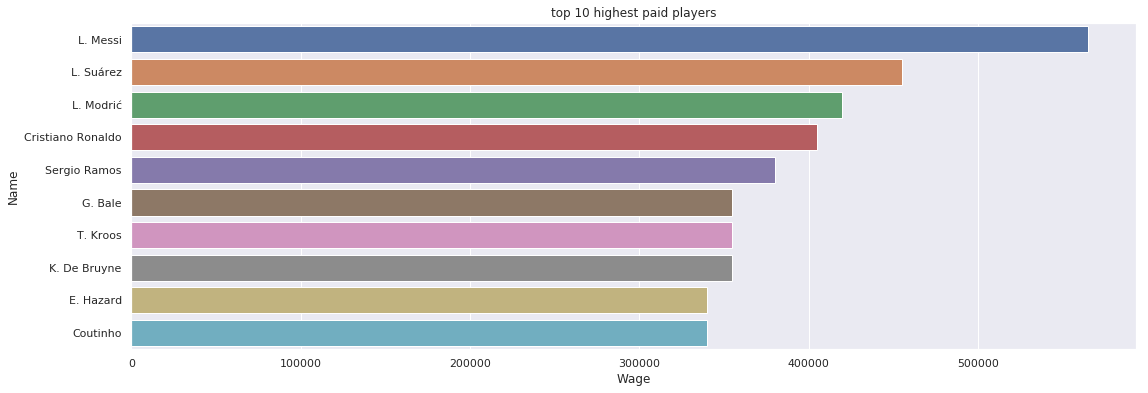

In [17]:
ax=sns.barplot(x='Wage', y='Name',data=df2.sort_values(by=[ 'Wage'], ascending=False ).head(10))
ax.set_title('top 10 highest paid players')

Text(0.5,1,'Value Vs Wage')

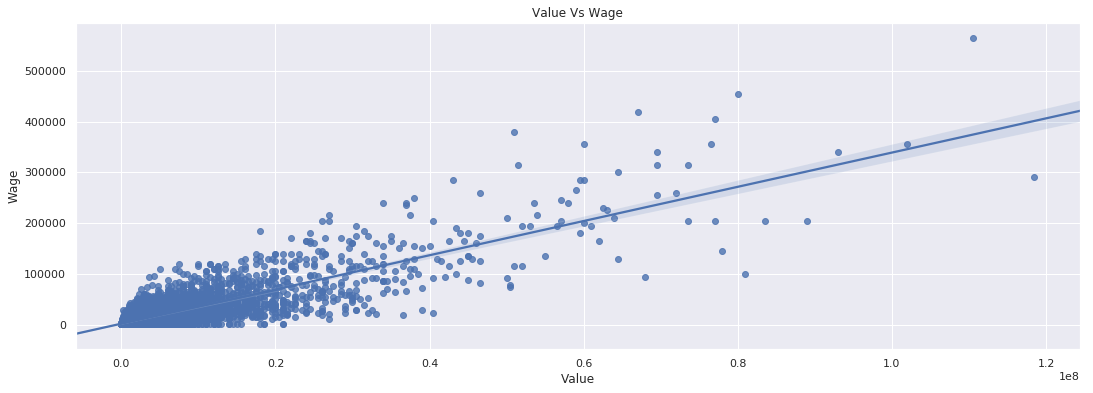

In [18]:
ax=sns.regplot(x='Value', y='Wage', data=df2)
ax.set_title('Value Vs Wage')

<Figure size 1872x1152 with 0 Axes>

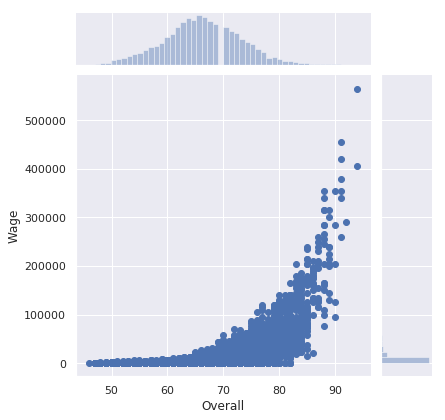

In [19]:

plt.figure(figsize=(26,16))
sns.jointplot(x='Overall', y='Wage', data=df2)


Text(0.5,1,'10 most valuable nations')

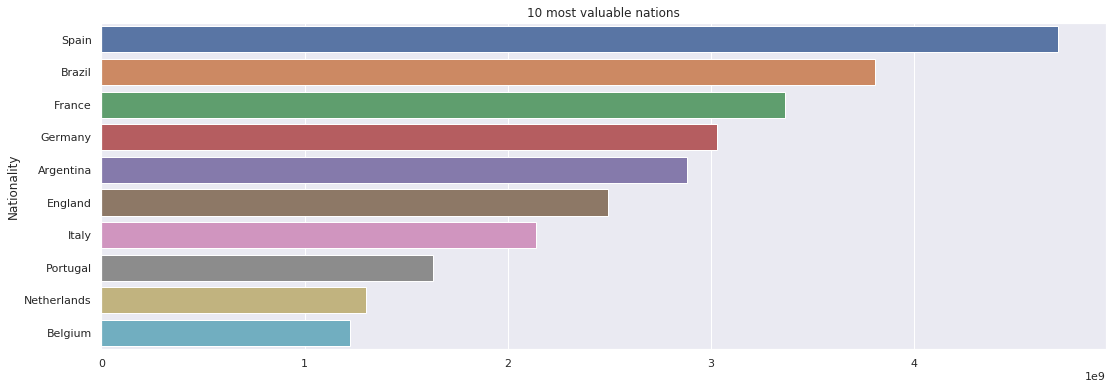

In [20]:
 Nation_value=df2['Value'].groupby(df2['Nationality']).sum().sort_values(ascending=False).head(10)
ax=sns.barplot(Nation_value.values, Nation_value.index )
ax.set_title('10 most valuable nations')

In [21]:
Top_values = df2[df2['Value']>df2['Value'].quantile(0.9)]




Text(0.5,1,'Top 10 clubs in the 90th percentile by value with the highest salaries')

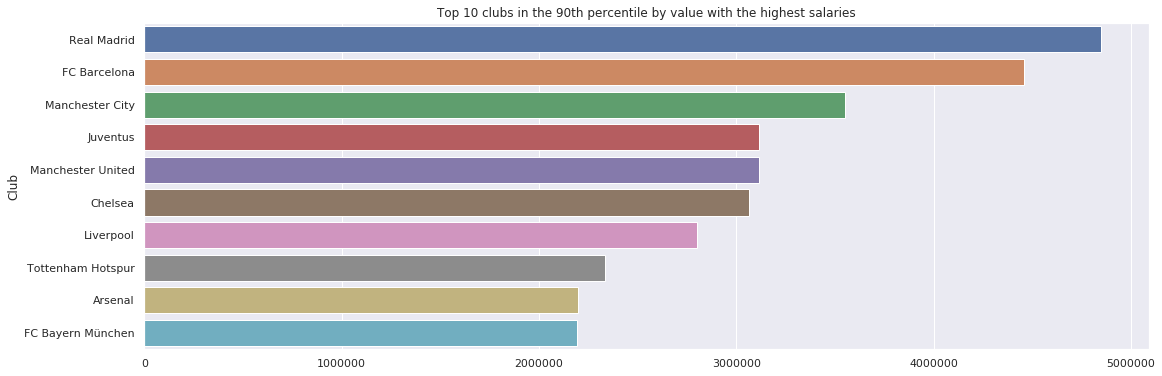

In [22]:

top_wage=Top_values['Wage'].groupby(Top_values['Club']).sum().sort_values(ascending=False).head(10)
ax=sns.barplot(top_wage.values, top_wage.index )
ax.set_title('Top 10 clubs in the 90th percentile by value with the highest salaries')

In [23]:
df2['growth_potential']=df2['Potential']-df2['Overall']

Text(0.5,1,'Top 10 players with the highest potential')

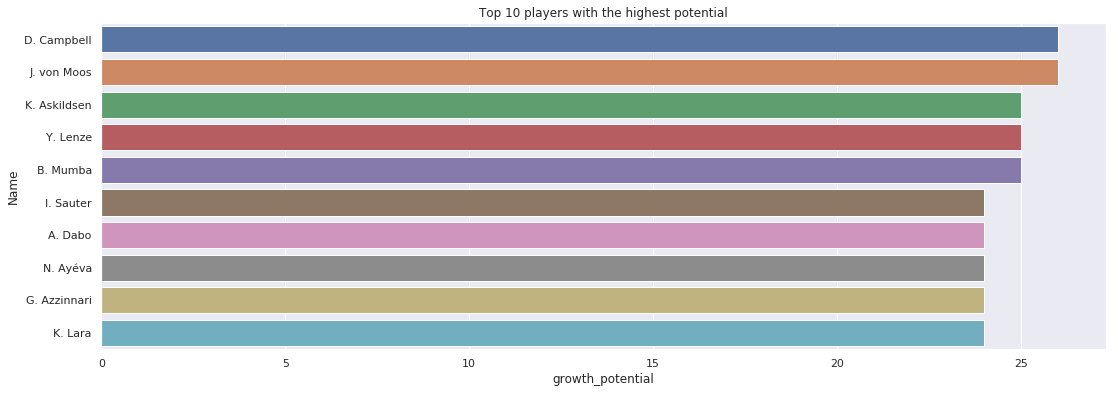

In [24]:
ax=sns.barplot(x='growth_potential', y='Name', data=df2.sort_values(by='growth_potential', ascending= False).head(10))
ax.set_title('Top 10 players with the highest potential')


Text(0.5,1,'Clubs with the most loaned players')

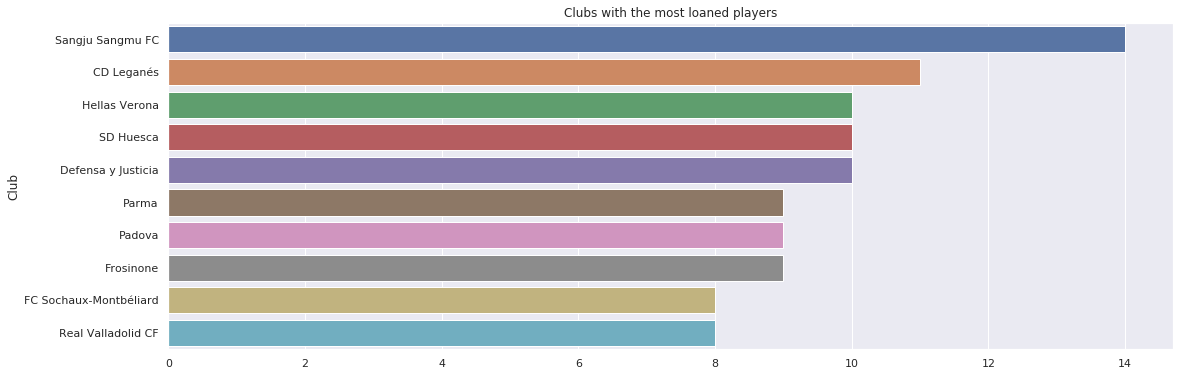

In [42]:
Loan_Clubs=df2['Loaned From'].groupby(df2['Club']).count().sort_values(ascending=False).head(10)
ax=sns.barplot(Loan_Clubs.values, Loan_Clubs.index)
ax.set_title('Clubs with the most loaned players')

In [48]:
df2.corr().round(3)

,Unnamed: 0,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,growth_potential
Unnamed: 0,1.000,0.419,-0.458,-0.973,-0.633,-0.527,-0.484,-0.598,-0.415,-0.203,...,-0.282,-0.250,-0.221,0.028,0.028,0.031,0.020,0.026,-0.511,0.524
ID,0.419,1.000,-0.740,-0.421,0.045,-0.140,-0.207,-0.235,-0.355,-0.078,...,-0.113,-0.089,-0.071,-0.105,-0.110,-0.106,-0.117,-0.105,-0.124,0.588
Age,-0.458,-0.740,1.000,0.456,-0.252,0.078,0.145,0.241,0.254,0.061,...,0.145,0.121,0.104,0.100,0.105,0.103,0.115,0.102,0.061,-0.866
Overall,-0.973,-0.421,0.456,1.000,0.660,0.632,0.576,0.608,0.501,0.212,...,0.288,0.254,0.223,-0.026,-0.025,-0.029,-0.017,-0.023,0.616,-0.528
Potential,-0.633,0.045,-0.252,0.660,1.000,0.580,0.489,0.383,0.375,0.161,...,0.163,0.144,0.129,-0.052,-0.054,-0.058,-0.051,-0.053,0.587,0.289
Value,-0.527,-0.140,0.078,0.632,0.580,1.000,0.858,0.380,0.656,0.167,...,0.136,0.110,0.089,-0.028,-0.029,-0.030,-0.027,-0.028,0.994,-0.150
Wage,-0.484,-0.207,0.145,0.576,0.489,0.858,1.000,0.350,0.672,0.142,...,0.147,0.128,0.112,-0.025,-0.025,-0.028,-0.025,-0.026,0.856,-0.182
Special,-0.598,-0.235,0.241,0.608,0.383,0.380,0.350,1.000,0.293,0.340,...,0.563,0.539,0.507,-0.674,-0.673,-0.669,-0.667,-0.672,0.369,-0.342
International Reputation,-0.415,-0.355,0.254,0.501,0.375,0.656,0.672,0.293,1.000,0.128,...,0.116,0.094,0.080,0.006,0.005,0.002,0.008,0.004,0.641,-0.216
Weak Foot,-0.203,-0.078,0.061,0.212,0.161,0.167,0.142,0.340,0.128,1.000,...,0.066,0.042,0.025,-0.230,-0.231,-0.227,-0.229,-0.231,0.160,-0.088


## Data Normalisation and partition

In [63]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = df.select_dtypes(include=numerics)
numeric_cols=numeric_cols.dropna(how='any')
excluded_variables=['Overall', 'GKDiving', 'GKHandling', 'GKKicking', 'GKReflexes']
X=numeric_cols.drop(excluded_variables, axis=1)
Y=numeric_cols['Overall']

In [64]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(X)
X[1]

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([-1.73072656, -6.31991107,  1.64822803,  3.71618681, 13.03345824,
       17.75971905,  2.29446012,  9.74834619,  1.60184985,  3.50670692,
       -0.78839877,  1.86440433,  2.49472872,  2.11091247,  1.5162457 ,
        2.49836666,  1.73059838,  1.84107598,  1.89460386,  1.58292752,
        2.13671192,  1.63252069,  1.79227597,  1.59474126,  3.75228857,
        0.42960093,  2.29655059,  2.520165  ,  1.54632656,  1.09223518,
        2.3877385 ,  0.40613575, -0.8578087 ,  2.30948115,  2.02526711,
        2.3256856 ,  3.15812472, -0.96952074, -0.77377337, -1.06842339,
       -0.14599188, 11.0191321 ])

In [65]:
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #0.3

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(13314, 42) (13314,)
(3329, 42) (3329,)


## Model and predictions


In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
print('b: {}'.format(lr.intercept_))
print('a Coefficients: \n', lr.coef_)

b: 66.16244270220469
a Coefficients: 
 [-4.36903039  0.18525506  1.00148385  0.94790548  1.05590623 -0.01437131
  3.78457647  0.15646817  0.00820349 -0.02605178 -0.04360801 -0.20097455
 -0.12797178  0.01502538  0.01844208 -0.24165765 -0.18637355 -0.25889626
 -0.2545267  -0.26086989  0.45689497 -0.04838376 -0.06432211 -0.12035077
  0.20259776 -0.27547649 -0.20462963 -0.17717829 -0.04754061  0.03137846
 -0.3010553  -0.31956444 -0.35000417 -0.5126997  -0.31752376 -0.30891818
  0.12616255 -0.15901537 -0.00513125 -0.45364095 -0.03411934 -0.20697048]


Mean Absolute Error (MAE): 0.8017088494043383
Variance score (R^2): 0.9758975512579566


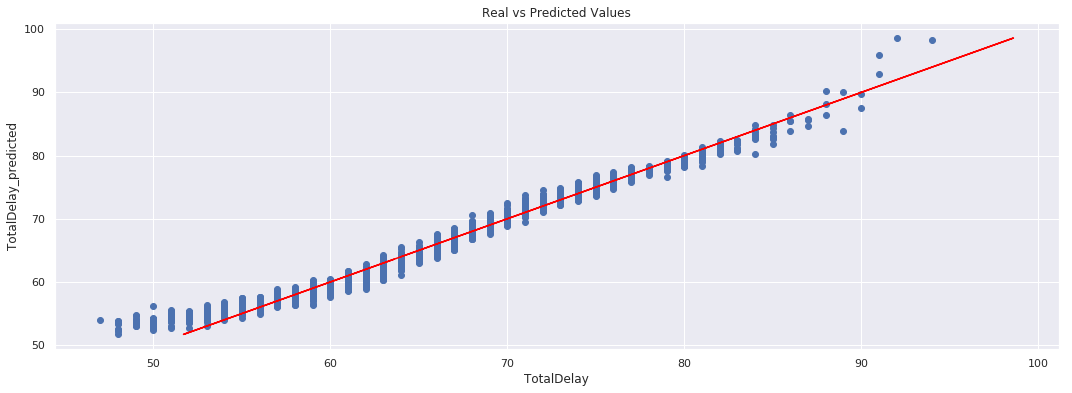

In [69]:
from sklearn.metrics import mean_absolute_error, r2_score

Y_pred = lr.predict(X_test)

print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(Y_test, Y_pred)))
print('Variance score (R^2): {}'.format(r2_score(Y_test, Y_pred)))

plt.title('Real vs Predicted Values')
plt.xlabel('TotalDelay')
plt.ylabel('TotalDelay_predicted')

plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red')


## KFold Validation

In [72]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 10
kf = KFold(shuffle=True)

scores = cross_val_score(lr, X_test, Y_test, scoring="neg_mean_absolute_error", cv=kf)

print('MAE: {}'.format(-scores))
print('MAE_mean: {}'.format(-scores.mean()))

MAE: [0.8207309  0.81456308 0.81456823]
MAE_mean: 0.8166207376496081


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
